In [6]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

import matplotlib.pyplot as plt
import shapely

In [11]:
df_alagamentos = gpd.read_file("../dados/Alagamentos")
df_alagamentos[:5]

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
0,1,"R. SANTA ANASTÁSIA, 14",CAJURU,CURITIBA,Cajuru,25273/2015,SMDS,2015-12-26,2015-12-26,16:41:00,NÃO,None,None,Alagamento,POINT (679576.047 7184652.216)
1,2,"AV. ANITA GARIBALDI, 4895",BOA VISTA,CURITIBA,Boa Vista,25246/2015,URBS,2015-12-25,2015-12-25,21:28:00,NÃO,None,None,Alagamento,POINT (675048.606 7192986.695)
2,3,"R. PEDRO GUSSO, 60",NOVO MUNDO,CURITIBA,Pinheirinho,25245/2015,SMDS,2015-12-25,2015-12-25,21:25:00,NÃO,None,None,Alagamento,POINT (671325.878 7179021.716)
3,4,"R. CAPITÃO JOÃO ZALESKI, 211",PINHEIRINHO,CURITIBA,Pinheirinho,25244/2015,SMDS,2015-12-25,2015-12-25,21:19:00,NÃO,None,None,Alagamento,POINT (674257.774 7181357.034)
4,5,"R. INÁCIO WOLSKI, 612",CIDADE INDUSTRIAL,CURITIBA,CIC,25241/2015,SMDS,2015-12-25,2015-12-25,20:55:00,NÃO,None,None,Alagamento,POINT (666554.696 7172968.235)


In [34]:
len(df_alagamentos)

2155

In [35]:

df_alagamentos.DATA = df_alagamentos.DATA.astype('datetime64[ns]')



In [37]:
df_alagamentos.sort_values(["DATA"], ascending= False)

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
2106,2169,"R. SAMUEL CEZAR, 935",ÁGUA VERDE,CURITIBA,Portao,05515/2018,SMOP,2018-03-30,2018-03-30,17:15:00,NÃO,None,None,Alagamento,POINT (673003.917 7183231.728)
2107,2170,"R. CARLOS AUGUSTO CORNELSEN, 353",BOM RETIRO,CURITIBA,Matriz,05439/2018,SMDS,2018-03-29,2018-03-29,17:57:00,NÃO,None,None,Alagamento,POINT (673510.493 7189234.547)
2108,2171,"R. DAS CARMELITAS, 5076",BOQUEIRÃO,CURITIBA,Boqueirao,05438/2018,SMDS,2018-03-29,2018-03-29,17:13:00,NÃO,None,None,Alagamento,POINT (678531.960 7176673.483)
2117,2180,None,CAMPO DE SANTANA,CURITIBA,Tatuquara,06320/2018,SMDS,2018-03-27,2018-03-27,19:15:00,NÃO,None,None,Alagamento,POINT (667002.915 7168496.397)
2110,2173,"Tv. Marcos Nelsom Casagrande, 62",GANCHINHO,CURITIBA,Bairro Novo,05351/2018,SMDS,2018-03-27,2018-03-28,23:27:00,NÃO,NOME,"TV. MARCOS NELSON CASAGRANDE, 62",Alagamento,POINT (676194.458 7173043.742)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2021,"R. DOUTOR BLEY ZORNIG, 1933",BOQUEIRÃO,CURITIBA,Boqueirao,00080/2009,SMDS,2009-01-02,2009-01-02,16:51:00,NÃO,None,None,Alagamento,POINT (677719.737 7176900.704)
1959,2022,"R. Prof. Theodócio Jorge Atherino, 13",CIDADE INDUSTRIAL,CURITIBA,Boqueirao,00079/2009,SMDS,2009-01-02,2009-01-02,16:51:00,NÃO,BAIRRO,BOQUEIRÃO,Alagamento,POINT (666879.929 7181137.177)
1941,2004,"R. PINHEIRO MACHADO, 210",FAZENDINHA,CURITIBA,Portao,00097/2009,SMDS,2009-01-02,2009-01-02,16:51:00,NÃO,None,None,Alagamento,POINT (667750.543 7180146.896)
1986,2049,"R. SETEMBRINO PORTELLA NETO, 279",CIDADE INDUSTRIAL,CURITIBA,CIC,00028/2009,SMDS,2009-01-01,2009-01-01,21:45:00,NÃO,None,None,Alagamento,POINT (666287.676 7178847.344)


In [23]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')

gdf = gpd.GeoDataFrame(
    df_alagamentos)
gdf = gdf.to_crs(df_places.crs)


In [13]:
gdf[:5]

,N_,ENDERECO,BAIRRO,CIDADE,NUCLEO,PROTOCOLO,SECRETARIA,DATA,DATA_ATEND,HORA,FLAGRANTE,MODIFICADO,ORIGINAL,NATUREZA,geometry
0,1,"R. SANTA ANASTÁSIA, 14",CAJURU,CURITIBA,Cajuru,25273/2015,SMDS,2015-12-26,2015-12-26,16:41:00,NÃO,None,None,Alagamento,POINT (-49.21414 -25.44429)
1,2,"AV. ANITA GARIBALDI, 4895",BOA VISTA,CURITIBA,Boa Vista,25246/2015,URBS,2015-12-25,2015-12-25,21:28:00,NÃO,None,None,Alagamento,POINT (-49.26022 -25.36960)
2,3,"R. PEDRO GUSSO, 60",NOVO MUNDO,CURITIBA,Pinheirinho,25245/2015,SMDS,2015-12-25,2015-12-25,21:25:00,NÃO,None,None,Alagamento,POINT (-49.29544 -25.49609)
3,4,"R. CAPITÃO JOÃO ZALESKI, 211",PINHEIRINHO,CURITIBA,Pinheirinho,25244/2015,SMDS,2015-12-25,2015-12-25,21:19:00,NÃO,None,None,Alagamento,POINT (-49.26658 -25.47467)
4,5,"R. INÁCIO WOLSKI, 612",CIDADE INDUSTRIAL,CURITIBA,CIC,25241/2015,SMDS,2015-12-25,2015-12-25,20:55:00,NÃO,None,None,Alagamento,POINT (-49.34214 -25.55128)


In [27]:
gdf.DATA.unique()

array(['2015-12-26', '2015-12-25', '2014-12-29', '2015-12-19',
       '2009-12-30', '2014-12-22', '2009-12-27', '2009-12-26',
       '2014-12-19', '2009-12-23', '2009-12-22', '2009-12-18',
       '2009-12-17', '2014-12-11', '2009-12-16', '2014-12-08',
       '2015-11-23', '2015-11-19', '2009-12-02', '2014-11-26',
       '2014-11-25', '2015-11-15', '2009-11-28', '2014-11-20',
       '2013-12-02', '2013-11-29', '2009-11-22', '2015-11-05',
       '2010-12-22', '2009-11-20', '2010-12-21', '2009-11-19',
       '2010-12-17', '2009-11-16', '2009-11-15', '2010-12-14',
       '2010-12-13', '2015-10-22', '2011-12-24', '2009-11-10',
       '2015-10-21', '2009-11-08', '2010-12-07', '2014-10-25',
       '2009-11-06', '2010-12-04', '2013-11-03', '2010-12-03',
       '2010-12-02', '2014-10-20', '2011-12-10', '2011-12-09',
       '2014-10-17', '2011-12-08', '2015-10-09', '2013-10-25',
       '2013-10-24', '2010-11-24', '2010-11-22', '2013-10-21',
       '2012-12-29', '2011-11-27', '2011-11-26', '2009-

In [32]:
# df_places_filter = gdf[gdf.DATA == "2018-02-26"]
df_places_filter = gdf[gdf['DATA'].str.contains("2018-03")]

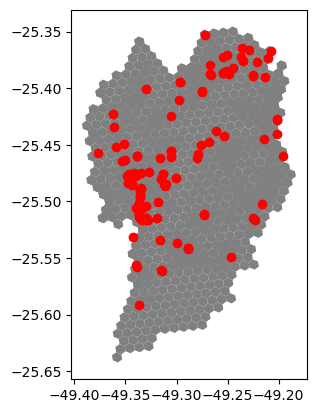

In [33]:
ax = df_places.plot(color='grey')
df_places_filter.plot(ax=ax,color='red')

plt.show()